In [1]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("D:\ML\P1\Cleaned_DS_Jobs_1.csv")

In [3]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Data Scientist,56-97,Job Success Profile\n\nData Scientist\n\nBuckm...,3.4,Buckman,"Memphis, TN","Memphis, TN",10000 employees,Company - Private,Chemical Manufacturing,...,1,1,0,1,0,0,0,0,data scientist,na
1,Machine Learning Engineer,56-97,Returning Candidate? Log back in to the Career...,3.4,Buckman,"Memphis, TN","Arlington, VA",10000 employees,Company - Private,Federal Agencies,...,1,1,0,0,0,0,0,0,mle,na
2,Research Scientist - Patient-Centered Research...,56-97,*This position can be in either of our Evidera...,3.4,Evidera,"Bethesda, MD","Bethesda, MD",10000 employees,Company - Private,Biotech & Pharmaceuticals,...,1,0,1,0,0,0,0,0,na,na
3,Jr. Business Data Analyst (position added 6/12...,56-97,April 2020 Update from WebFX: We're still acti...,3.4,webfx.com,"Harrisburg, PA","Harrisburg, PA",10000 employees,Company - Private,Advertising & Marketing,...,1,0,1,0,0,0,0,0,analyst,jr
4,Sr. Data Scientist II,56-97,Data Scientist\n\nBefore the dawn of everythin...,3.4,Argo Group US,"New York, NY","Hamilton, Bermuda",10000 employees,Company - Private,Insurance Carriers,...,1,1,0,1,1,1,0,0,data scientist,senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,"Scientist / Group Lead, Cancer Biology",92-155,"Scientist / Group Lead, Cancer Biology\nLocati...",5.0,Monte Rosa Therapeutics,"Cambridge, MA",-1,51 to 200 employees,Subsidiary or Business Segment,-1,...,133,0,1,0,0,0,0,0,na,senior
467,AI Ops Data Scientist,92-155,"Company\n\nAstraZeneca is a global, innovation...",5.0,AstraZeneca,"Gaithersburg, MD","Cambridge, United Kingdom",51 to 200 employees,Subsidiary or Business Segment,Biotech & Pharmaceuticals,...,133,1,0,1,1,1,0,0,data scientist,na
468,Senior Data Scientist,105-167,"About Us\n\nAt GutCheck, we pioneered agile ma...",5.0,GutCheck,"Denver, CO","Denver, CO",51 to 200 employees,Subsidiary or Business Segment,Advertising & Marketing,...,140,0,0,0,0,0,0,0,data scientist,senior
469,Sr. ML/Data Scientist - AI/NLP/Chatbot,105-167,Sr. ML/Data Scientist - AI/NLP/Chatbot\n\nMist...,5.0,Juniper Networks,"Cupertino, CA","Sunnyvale, CA",51 to 200 employees,Subsidiary or Business Segment,Telecommunications Services,...,140,1,1,0,1,1,0,0,data scientist,senior


In [6]:
df1 = df.drop(['Job Description','Salary Estimate','Job Title','Revenue','Sector','job_state','same_state','Company Name','Location','Headquarters','Industry','python','excel','hadoop','spark','aws','tableau','big_data','job_simp','seniority'], axis=1)
df1

,Rating,Size,Type of ownership,min_salary,max_salary,avg_salary,company_age
0,3.4,10000 employees,Company - Private,56,97,76,1
1,3.4,10000 employees,Company - Private,56,97,76,1
2,3.4,10000 employees,Company - Private,56,97,76,1
3,3.4,10000 employees,Company - Private,56,97,76,1
4,3.4,10000 employees,Company - Private,56,97,76,1
...,...,...,...,...,...,...,...
466,5.0,51 to 200 employees,Subsidiary or Business Segment,92,155,123,133
467,5.0,51 to 200 employees,Subsidiary or Business Segment,92,155,123,133
468,5.0,51 to 200 employees,Subsidiary or Business Segment,105,167,136,140
469,5.0,51 to 200 employees,Subsidiary or Business Segment,105,167,136,140


In [7]:
df1['company_size'] = df1['Size'].apply(lambda x: x.split(' ')[0])
df1

,Rating,Size,Type of ownership,min_salary,max_salary,avg_salary,company_age,company_size
0,3.4,10000 employees,Company - Private,56,97,76,1,10000
1,3.4,10000 employees,Company - Private,56,97,76,1,10000
2,3.4,10000 employees,Company - Private,56,97,76,1,10000
3,3.4,10000 employees,Company - Private,56,97,76,1,10000
4,3.4,10000 employees,Company - Private,56,97,76,1,10000
...,...,...,...,...,...,...,...,...
466,5.0,51 to 200 employees,Subsidiary or Business Segment,92,155,123,133,51
467,5.0,51 to 200 employees,Subsidiary or Business Segment,92,155,123,133,51
468,5.0,51 to 200 employees,Subsidiary or Business Segment,105,167,136,140,51
469,5.0,51 to 200 employees,Subsidiary or Business Segment,105,167,136,140,51


In [8]:
df1=df1.drop(['Size'], axis=1)

In [9]:
df1

,Rating,Type of ownership,min_salary,max_salary,avg_salary,company_age,company_size
0,3.4,Company - Private,56,97,76,1,10000
1,3.4,Company - Private,56,97,76,1,10000
2,3.4,Company - Private,56,97,76,1,10000
3,3.4,Company - Private,56,97,76,1,10000
4,3.4,Company - Private,56,97,76,1,10000
...,...,...,...,...,...,...,...
466,5.0,Subsidiary or Business Segment,92,155,123,133,51
467,5.0,Subsidiary or Business Segment,92,155,123,133,51
468,5.0,Subsidiary or Business Segment,105,167,136,140,51
469,5.0,Subsidiary or Business Segment,105,167,136,140,51


In [11]:
df1['Type of ownership'].unique()

array(['Company - Private', 'Company - Public', 'Contract', 'Government',
       'Hospital', 'Nonprofit Organization', 'Other Organization',
       'Private Practice / Firm', 'Self-employed',
       'Subsidiary or Business Segment'], dtype=object)

Text(0, 0.5, 'avg_salary')

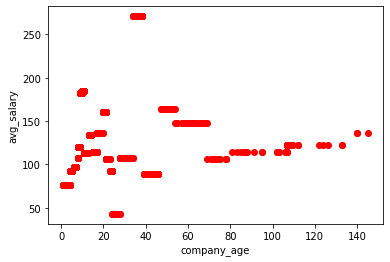

In [17]:
plt.scatter(df1.company_age, df1.avg_salary, color='red')
plt.xlabel("company_age")
plt.ylabel("avg_salary")

Text(0, 0.5, 'avg_salary')

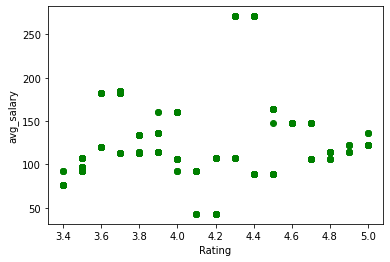

In [18]:
plt.scatter(df1.Rating, df1.avg_salary, color='green')
plt.xlabel("Rating")
plt.ylabel("avg_salary")

In [19]:
reg = linear_model.LinearRegression()
reg.fit(df1[['Rating','company_age','company_size']], df1.avg_salary)

LinearRegression()

In [20]:
reg.coef_

array([ 4.98000762e+01, -6.49232263e-01, -1.81020162e-03])

In [21]:
reg.intercept_

-53.57050719490553

In [22]:
reg.predict([[3,5,500]])

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([91.67845917])